In [1]:
from goes2go.data import goes_nearesttime

# Tools from https://github.com/blaylockbk/Carpenter_Workshop
from toolbox.wind import spddir_to_uv
from toolbox.cartopy_tools_OLD import common_features, pc
from paint.standard2 import cm_wind


/opt/mamba/envs/herbie/lib/python3.11/site-packages/toolbox/cartopy_tools_OLD.py:37: UserWarning: Migrate to new `cartopy_tools` for latest updates and features.
  warnings.warn("Migrate to new `cartopy_tools` for latest updates and features.")
/opt/mamba/envs/herbie/lib/python3.11/site-packages/toolbox/cartopy_tools_OLD.py:241: AccessorRegistrationWarning: registration of accessor <class 'toolbox.cartopy_tools_OLD.xr_to_cartopy'> under name 'xmap' for type <class 'xarray.core.dataset.Dataset'> is overriding a preexisting attribute with the same name.
  @xr.register_dataset_accessor("xmap")


In [2]:
# Download Level-2 derived motion wind ABI product
gwnd = goes_nearesttime("2023-10-18 15:00", product="ABI-L2-DMWVC")

 👮🏻‍♂️ File already exists. Do not overwrite: /home/michael/data/noaa-goes16/ABI-L2-DMWVC/2023/291/15/OR_ABI-L2-DMWVC-M6C08_G16_s20232911501172_e20232911503545_c20232911536068.nc
📦 Finished downloading [1] files to [/home/michael/data/noaa-goes16/ABI-L2-DMWVC].
📖💽 Reading (1/1) file from LOCAL COPY [/home/michael/data/noaa-goes16/ABI-L2-DMWVC/2023/291/15/OR_ABI-L2-DMWVC-M6C08_G16_s20232911501172_e20232911503545_c20232911536068.nc]. 

/opt/mamba/envs/herbie/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      


In [3]:
# Download ABI Multi-channel product (for RGB background)
g = goes_nearesttime("2023-10-18 15:00", product="ABI")

 👮🏻‍♂️ File already exists. Do not overwrite: /home/michael/data/noaa-goes16/ABI-L2-MCMIPC/2023/291/14/OR_ABI-L2-MCMIPC-M6_G16_s20232911456172_e20232911458557_c20232911459053.nc
📦 Finished downloading [1] files to [/home/michael/data/noaa-goes16/ABI-L2-MCMIPC].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [4]:
# Convert GOES wind speed and direction to u- and v-wind components
gu, gv = spddir_to_uv(gwnd.wind_speed, gwnd.wind_direction)

Text(1.0, 1.0, '14:57 UTC 18-Oct-2023')

/opt/mamba/envs/herbie/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
/opt/mamba/envs/herbie/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)
/opt/mamba/envs/herbie/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


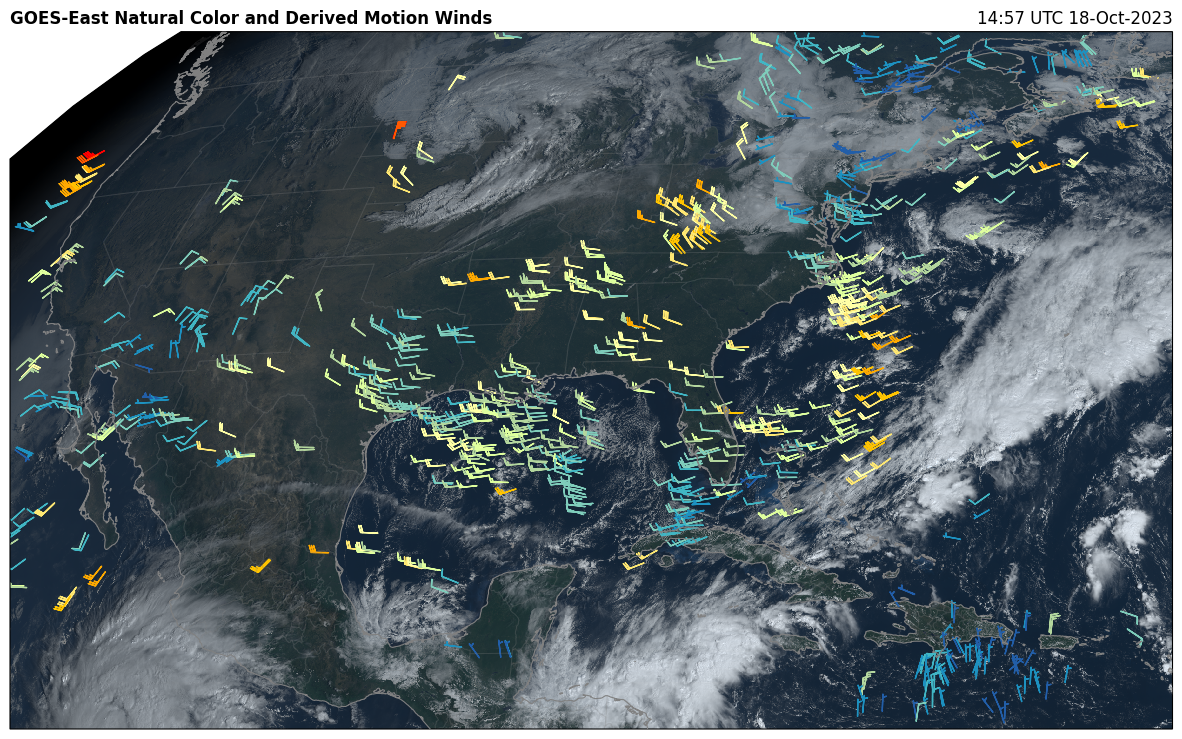

In [5]:
# Plot on Geostationary map with NaturalColor RGB product

ax = common_features("10m", dark=True, figsize=[15, 10], STATES=True, crs=g.FOV.crs)
ax.barbs(
    gwnd.lon.data,
    gwnd.lat.data,
    gu.data,
    gv.data,
    gwnd.wind_speed,
    **cm_wind().cmap_kwargs,
    length=5,
    transform=pc,
)

ax.imshow(g.rgb.NaturalColor(), **g.FOV.imshow_kwargs)

ax.set_title(
    f"{g.orbital_slot} Natural Color and Derived Motion Winds",
    loc="left",
    fontweight="bold",
)
ax.set_title(f"{g.t.dt.strftime('%H:%M UTC %d-%b-%Y').item()}", loc="right")